# Wrangle Zillow

### If you are finished with the exercises...here is what I want y'all to do next...this will help you prepare for the regression project :
- use mySQL to query the zillow database.
- you will need to use the properties_2017 and predictions_2017 tables.
- you will want to gather the following information (and figure out which columns are most likely to give you this information)...square feet of the house ("living square feet"), number of bedrooms, number of bathrooms, the assess value of the house by the tax appraisal district ('taxvaluedollarcnt'...this will be your target variable in the project), and 2-3 other variables you think will be useful (think about what you know about what drives home prices, and also the amount of non-null values available in selecting your extra variables.
- you will want to limit your data to properties that were sold in may, june, july or august (date is in predictions_2017 table).
- There are a ton of rows...so think about how you can limit your data set early to keep your query going! i.e. filter the dates!

In [83]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np 
import os
from env import host, user, password 
import wrangle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Acquire

In [13]:
#Connection function to access Codeup Database and retrieve zillow dataset from mysql
def get_connection(db, user=user, host=host, password=password):
    '''
    This function creates a connection to Codeup Database with 
    info from personal env file (env file has user login information).
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'  

##############ACQUIRE##################

def acquire_zillow():
    '''
    This function reads in the zillow data from the Codeup 
    Database connection made from get_connection
    and returns a pandas DataFrame with all columns.
    '''
    sql_query = '''
                SELECT parcelid, bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet,
                taxvaluedollarcnt
                FROM  properties_2017
                JOIN predictions_2017 USING(parcelid)
                WHERE transactiondate between "2017-05-01" and "2017-08-31"
                and unitcnt = 261 or 263 or 273 or 274 or 276 or 279;
                '''
    
    return pd.read_sql(sql_query, get_connection('zillow'))    



def get_zillow_data(cached=False):
    '''
    This function reads in zillow data from Codeup database and 
    writes data to a csv file if cached == False. If cached == True 
    reads in zillow df from a csv file, returns df.
    '''
    if cached == False or os.path.isfile('zillow.csv') == False:
        
        # Read fresh data from db into a DataFrame.
        df = acquire_zillow()
        
        # Write DataFrame to a csv file.
        df.to_csv('zillow.csv')
        
    else:
        
        # If csv file exists or cached == True, read in data from csv.
        df = pd.read_csv('zillow.csv', index_col=0)
        
    return df

In [14]:
#functions to get specific zillow data
def acquire_some_more_zillow():
    '''
    This function reads in the zillow data from the Codeup 
    Database connection made from get_connection
    and returns a pandas DataFrame with all columns.
    '''
    sql_query = '''
                SELECT parcelid, bedroomcnt, bathroomcnt, buildingqualitytypeid, yearbuilt, 
                regionidcounty, regionidzip, fips, latitude, longitude, calculatedfinishedsquarefeet, 
                taxamount, taxvaluedollarcnt
                FROM  properties_2017
                JOIN predictions_2017 USING(parcelid)
                WHERE transactiondate between "2017-05-01" and "2017-08-31"
                and unitcnt = 1;
                '''
    return pd.read_sql(sql_query, get_connection('zillow')) 


def get_some_more_zillow_data(cached=False):
    '''
    This function reads in zillow data from Codeup database and 
    writes data to a csv file if cached == False. If cached == True 
    reads in zillow df from a csv file, returns df.
    '''
    if cached == False or os.path.isfile('zillow.csv') == False:
        
        # Read fresh data from db into a DataFrame.
        df = acquire_some_more_zillow()
        
        # Write DataFrame to a csv file.
        df.to_csv('zillow.csv')
        
    else:
        
        # If csv file exists or cached == True, read in data from csv.
        df = pd.read_csv('zillow.csv', index_col=0)
        
    return df

In [15]:
#features for some zillow data: "parcelid", "bedroomcnt", "bathroomcnt", "buildingqualitytypeid", "yearbuilt", "regionidcounty","fips","calculatedfinishedsquarefeet", "taxamount", "taxvaluedollarcnt"
#sql query:
#SELECT parcelid, bedroomcnt, bathroomcnt, buildingqualitytypeid, yearbuilt, regionidcounty, fips, calculatedfinishedsquarefeet, taxamount, taxvaluedollarcnt
#FROM properties_2017
#JOIN predictions_2017 using(parcelid)
3#WHERE transactiondate between "2017-05-01" and "2017-06-30"
#and unitcnt = 1;

3

In [16]:
df = get_zillow_data(cached=False)

# Prepare First Iteration

## Summarize
- head()
- describe()
- info()
- isnull()
- value_counts()
- shape

In [17]:
df.head()

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt
0,14297519,4.0,3.5,3100.0,1023282.0
1,17052889,2.0,1.0,1465.0,464000.0
2,14186244,3.0,2.0,1243.0,564778.0
3,12177905,4.0,3.0,2376.0,145143.0
4,10887214,3.0,3.0,1312.0,119407.0


In [18]:
df.describe()

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt
count,7.761400e+04,77580.000000,77580.000000,77379.000000,7.757900e+04
mean,1.300781e+07,3.053222,2.298492,1784.925923,4.901476e+05
std,3.518694e+06,1.140472,0.996726,954.247864,6.537942e+05
min,1.071186e+07,0.000000,0.000000,128.000000,1.000000e+03
25%,1.153821e+07,2.000000,2.000000,1182.000000,2.068990e+05
50%,1.253006e+07,3.000000,2.000000,1542.000000,3.588780e+05
75%,1.421100e+07,4.000000,3.000000,2112.000000,5.690000e+05
max,1.676893e+08,16.000000,18.000000,35640.000000,4.906124e+07


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77614 entries, 0 to 77613
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77614 non-null  int64  
 1   bedroomcnt                    77580 non-null  float64
 2   bathroomcnt                   77580 non-null  float64
 3   calculatedfinishedsquarefeet  77379 non-null  float64
 4   taxvaluedollarcnt             77579 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 3.0 MB


### .info() takeaways
- bedroom and bathroom count are floats, look into if there are really half bedrooms.  I know half bathrooms exist, but I should still check it out later in value counts.  

In [20]:
df.isnull().sum()

parcelid                          0
bedroomcnt                       34
bathroomcnt                      34
calculatedfinishedsquarefeet    235
taxvaluedollarcnt                35
dtype: int64

### isnull().sum() takeaways
- drop null bedroom and bathroom bc very few and cannot pull the data from another column
- drop calculated square feet as well
- drop tax value (can go back and calculate later)

In [39]:
df.isna().sum()

parcelid                          0
bedroomcnt                       34
bathroomcnt                      34
calculatedfinishedsquarefeet    235
taxvaluedollarcnt                35
dtype: int64

### isna().sum() takeaways
- drop all

In [40]:
df.columns

Index(['parcelid', 'bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt'],
      dtype='object')

In [41]:
#bedroom value counts
df.bedroomcnt.value_counts()


3.0     30437
2.0     19223
4.0     17551
5.0      4550
1.0      3391
6.0      1000
0.0       837
8.0       253
7.0       208
9.0        70
10.0       31
12.0       16
11.0        9
13.0        2
16.0        1
14.0        1
Name: bedroomcnt, dtype: int64

In [42]:
#bathroom value counts
df.bathroomcnt.value_counts()


2.0     31576
3.0     17354
1.0     12945
2.5      6607
4.0      3356
1.5      1419
3.5      1036
5.0      1026
4.5       696
0.0       599
6.0       419
5.5       224
7.0       114
8.0       108
6.5        47
9.0        23
7.5        16
10.0        7
8.5         3
11.0        3
13.0        1
18.0        1
Name: bathroomcnt, dtype: int64

In [43]:
#square feet value counts
df.calculatedfinishedsquarefeet.value_counts()


1200.0     182
1120.0     169
1440.0     148
1080.0     133
1260.0     121
          ... 
6852.0       1
12056.0      1
4533.0       1
9065.0       1
7196.0       1
Name: calculatedfinishedsquarefeet, Length: 4972, dtype: int64

In [44]:
#tax value value counts
df.taxvaluedollarcnt.value_counts()


400000.0    56
600000.0    50
350000.0    49
450000.0    45
455000.0    44
            ..
247786.0     1
820528.0     1
302891.0     1
92106.0      1
98304.0      1
Name: taxvaluedollarcnt, Length: 50949, dtype: int64

In [45]:
df.shape


(77614, 5)

## Visualize Univariates

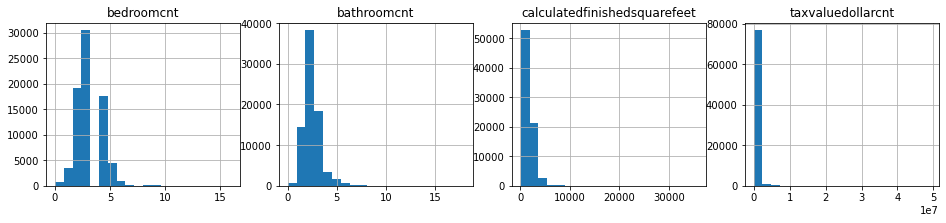

In [46]:
plt.figure(figsize=(16, 3))

for i, col in enumerate(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df[col]  
    plt.subplot(1,4, plot_number)
    plt.title(col)
    series.hist(bins=20)

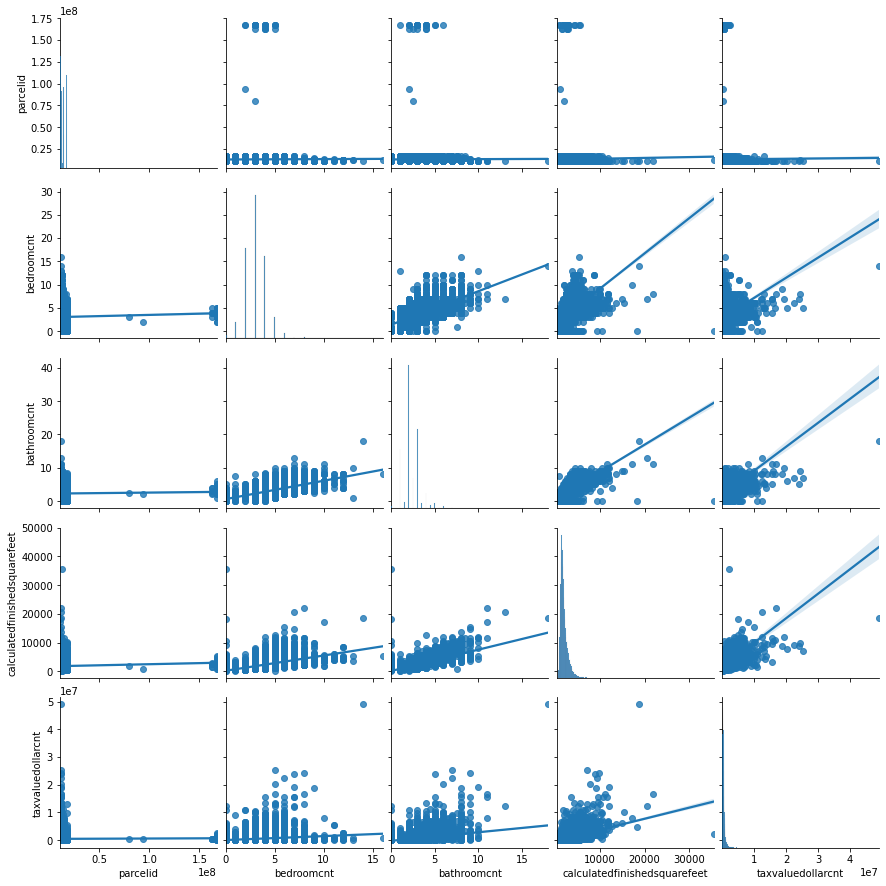

In [55]:
sns.pairplot(df, kind= "reg")

## Clean

### Clean Plan:
- drop nans/nulls
- drop outliers
- fix any data errors
- change bedrooms to int
- change names of columns to be easier to understand
- scale data
- split the data

##### Nulls/Nans

In [47]:
# drop the two nulls/nans observed earlier
df = df.dropna()


In [48]:
#ensure they dropped
#squarefeet no longer has nulls/nans so we can press forward
df.isna().sum()

parcelid                        0
bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
dtype: int64

In [49]:
df.shape


(77378, 5)

##### Outliers

In [71]:
columns = ['bedrooms', 'bathrooms','square_feet', 'tax_value']
for x in columns:
    
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = (Q3 - Q1) * 1.5
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    df = df[df[x] < (upper)]
    
    print('column:', x,'\nIQR:', IQR, '\nUpper bound:', upper, '\nLower bound:', lower, '\n')

column: bedrooms 
IQR: 3.0 
Upper bound: 8.5 
Lower bound: -2.5 

column: bathrooms 
IQR: 1.5 
Upper bound: 5.25 
Lower bound: -0.25 

column: square_feet 
IQR: 1351.5 
Upper bound: 4105.25 
Lower bound: -850.25 

column: tax_value 
IQR: 515614.5 
Upper bound: 1319540.75 
Lower bound: -571045.75 



In [72]:
df.shape


(72749, 4)

##### 77378 to 72749 with the removal of outliers

##### Change names of columns

In [56]:

# Some prep
df = df.rename(columns={"bedroomcnt": "bedrooms", 
                        "bathroomcnt": "bathrooms", 
                        "calculatedfinishedsquarefeet": "square_feet", 
                        "taxvaluedollarcnt": "tax_value"})

In [57]:
df.head()

,parcelid,bedrooms,bathrooms,square_feet,tax_value
0,14297519,4.0,3.5,3100.0,1023282.0
1,17052889,2.0,1.0,1465.0,464000.0
2,14186244,3.0,2.0,1243.0,564778.0
3,12177905,4.0,3.0,2376.0,145143.0
4,10887214,3.0,3.0,1312.0,119407.0


#### Change room counts to int

In [58]:
df['bedrooms'] = df.bedrooms.astype('int')


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77378 entries, 0 to 77613
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   parcelid     77378 non-null  int64  
 1   bedrooms     77378 non-null  int64  
 2   bathrooms    77378 non-null  float64
 3   square_feet  77378 non-null  float64
 4   tax_value    77378 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 3.5 MB


##### Set parcelid as index

In [60]:
df = df.set_index("parcelid")

In [73]:
df.head()

,bedrooms,bathrooms,square_feet,tax_value
parcelid,,,,
14297519,4,3.5,3100.0,1023282.0
17052889,2,1.0,1465.0,464000.0
14186244,3,2.0,1243.0,564778.0
12177905,4,3.0,2376.0,145143.0
10887214,3,3.0,1312.0,119407.0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72749 entries, 14297519 to 13083743
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     72749 non-null  int64  
 1   bathrooms    72749 non-null  float64
 2   square_feet  72749 non-null  float64
 3   tax_value    72749 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 2.8 MB


### Split

In [77]:
def train_validate_test_split(df, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed)
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed)
    return train, validate, test

In [78]:
train, validate, test = train_validate_test_split(df, seed=123)

In [79]:
train.head()

,bedrooms,bathrooms,square_feet,tax_value
parcelid,,,,
11206599,3,3.0,1556.0,228431.0
13042976,4,3.0,2593.0,379955.0
12867101,2,1.0,1000.0,443723.0
11248986,3,2.0,1468.0,98355.0
11400581,2,3.0,1399.0,220257.0


In [80]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (40739, 4)
validate -> (17460, 4)
test -> (14550, 4)


In [81]:
X_train = train.drop(columns='tax_value')

y_train = train['tax_value']

X_validate = validate.drop(columns='tax_value')

y_validate = validate['tax_value']

X_test = test.drop(columns='tax_value')

y_test = test['tax_value']

In [82]:
print(f'X_train -> {X_train.shape}')
print(f'X_validate -> {X_validate.shape}')
print(f'X_test -> {X_test.shape}')

X_train -> (40739, 3)
X_validate -> (17460, 3)
X_test -> (14550, 3)


### Scale

In [87]:
scaler = StandardScaler()

In [88]:
columns_to_scale = ['bedrooms', 'bathrooms', 'square_feet']

In [89]:
scaler.fit(train[columns_to_scale])

StandardScaler()

In [90]:
scaled_column_names = [c + '_scaled' for c in columns_to_scale]

In [91]:
train_scaled = pd.concat([
                        train,
                        pd.DataFrame(scaler.transform(train[columns_to_scale]), 
                        columns=scaled_column_names, 
                        index=train.index)],
                        axis=1)

In [92]:
validate_scaled = pd.concat([
                        validate,
                        pd.DataFrame(scaler.transform(validate[columns_to_scale]), 
                        columns=scaled_column_names, 
                        index=validate.index)],
                        axis=1)

In [93]:
test_scaled = pd.concat([
                        test,
                        pd.DataFrame(scaler.transform(test[columns_to_scale]), 
                        columns=scaled_column_names, 
                        index=test.index)],
                        axis=1)

## Explore

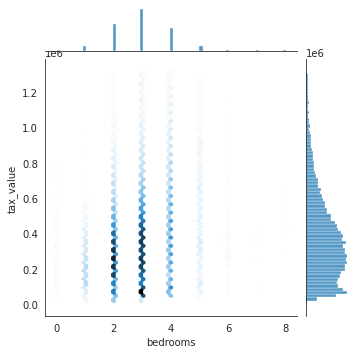

In [133]:
with sns.axes_style('white'):
    j = sns.jointplot("bedrooms", "tax_value", data=train_scaled, kind = 'hex', height=5);
plt.show()

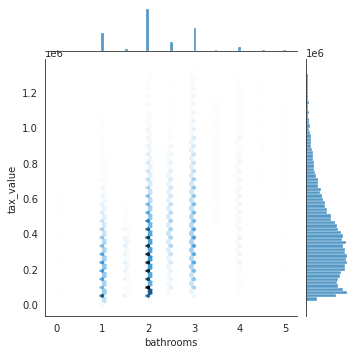

In [129]:
#kind{ “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }

with sns.axes_style('white'):
    j = sns.jointplot("bathrooms", "tax_value", data=train_scaled, kind='hex', height=5);
plt.show()

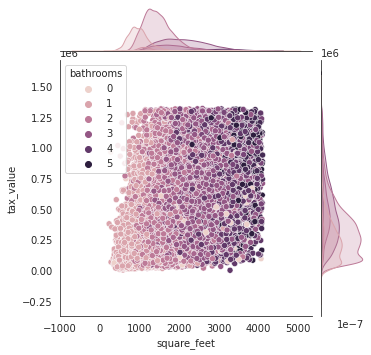

In [125]:
with sns.axes_style('white'):
    j = sns.jointplot("square_feet", "tax_value", data=train_scaled, hue = "bathrooms", height=5);
plt.show()

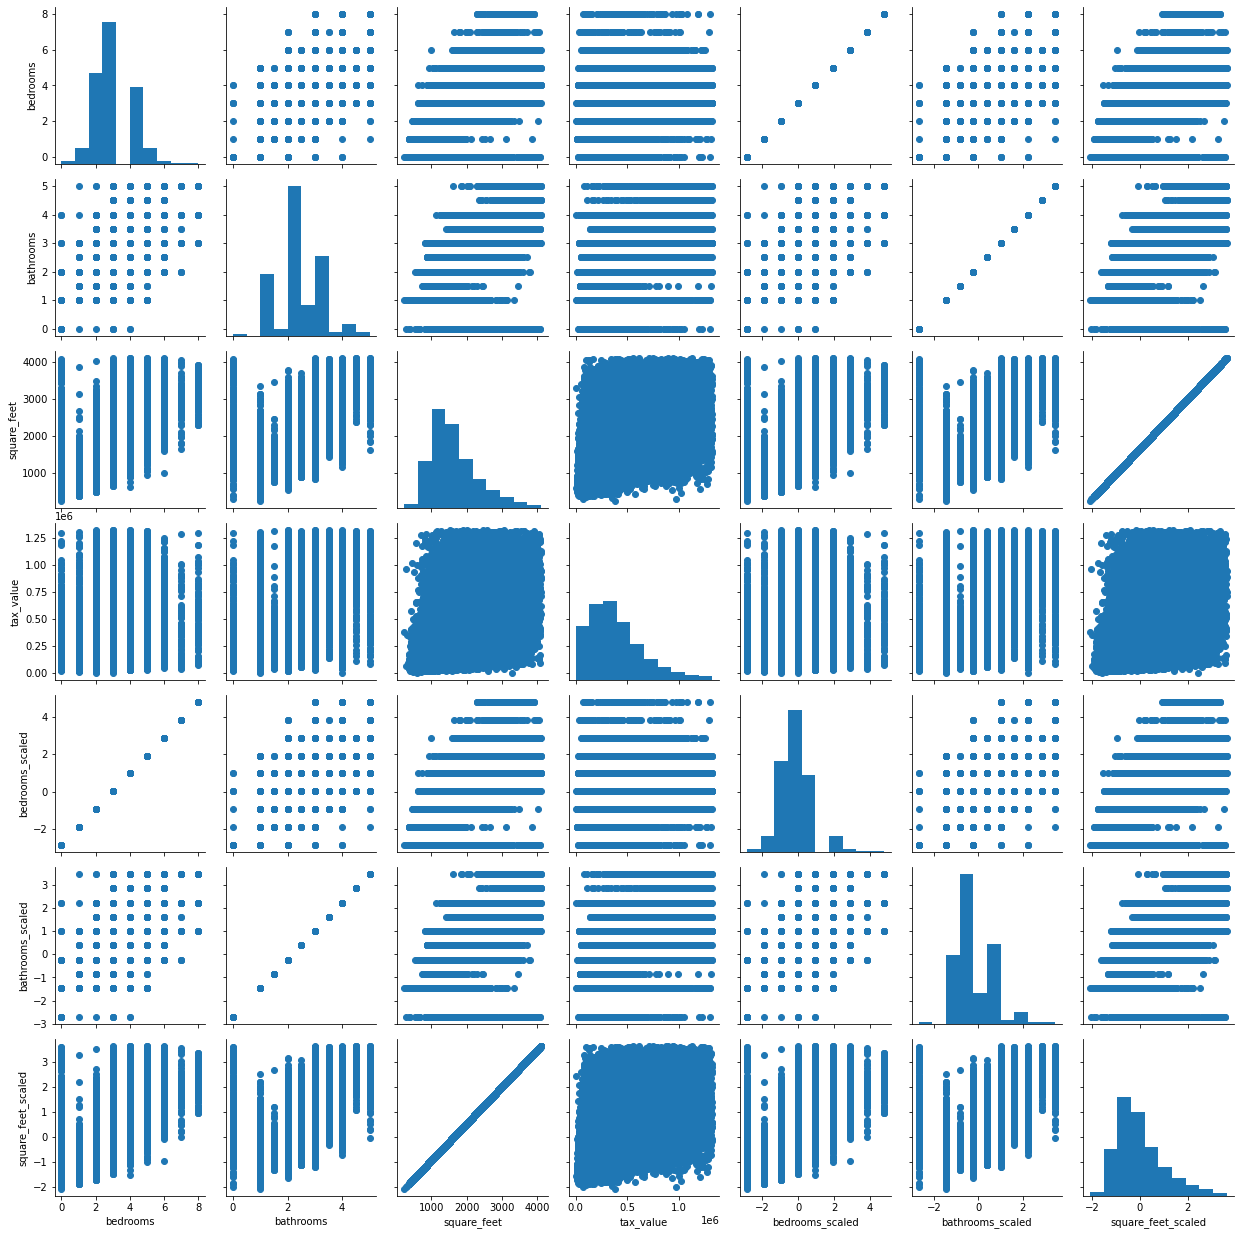

In [134]:
g = sns.PairGrid(train_scaled)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

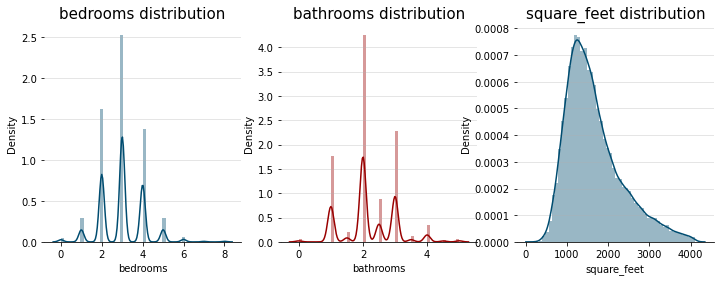

In [113]:
top3 = ['bedrooms', 'bathrooms', 'square_feet']
colors = ['#004c70', '#990000', '#004c70']

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (12,4))
for i, col in enumerate(top3):
    sns.distplot(train_scaled[col], color = colors[i], ax = ax[i])
    ax[i].set_title(f'{col} distribution', fontsize = 15)

for s in ['top','left','right']:
    ax[0].spines[s].set_visible(False)
    ax[1].spines[s].set_visible(False)
    ax[2].spines[s].set_visible(False)
ax[0].grid(axis='y', linestyle='-', alpha=0.4); ax[1].grid(axis='y', linestyle='-', alpha=0.4); ax[2].grid(axis='y', linestyle='-', alpha=0.4)

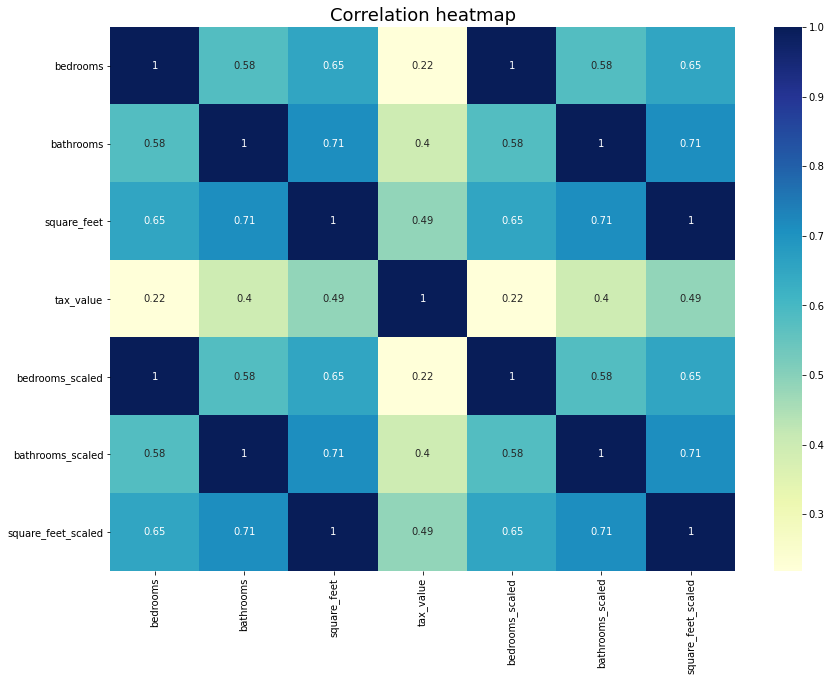

In [106]:

plt.figure(figsize = (14,10))
sns.heatmap(train_scaled.corr(), cmap='YlGnBu', annot=True)
plt.title('Correlation heatmap', fontsize = 18)
plt.show()

<AxesSubplot:xlabel='tax_value'>

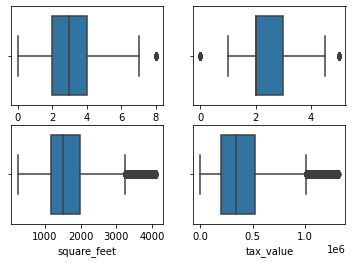

In [115]:
plt.subplot(221)
sns.boxplot(train_scaled.bedrooms)

plt.subplot(222)
sns.boxplot(train_scaled.bathrooms)

plt.subplot(223)
sns.boxplot(train_scaled.square_feet)

plt.subplot(224)
sns.boxplot(train_scaled.tax_value)

## Statistical tests
- 1 corr and 1 ttest, come back and run more if time allows

In [151]:
#set confidence interval and alpha before the test
conf_interval = .95 # desired confidence interval
alpha = 1 - conf_interval

#### Test 1 (corr):  
- ho = there is no linear correlation between the square footage of a home and tax value
- ha = there is a linear correlation between the square footage of a home and tax value

##### Correlation Gotchas!
When working with correlation, keep in mind:

- Correlation is not causality.
- Correlation measures linear relationship between the 2 variables. -However, there may be other types of relationships, such as a quadratic or absolute value relationship.
- Correlations can be misleading when confounding variables are ignored.
- Correlation tells you nothing about how large the relationship is.

In [153]:
#calculate pearsons correlation coefficient
from scipy import stats
corr, p = stats.pearsonr(train_scaled.square_feet_scaled, train_scaled.tax_value)
corr, p

(0.48631397474588767, 0.0)

In [157]:
#correlation test summary
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

Pvalue is: 0.0 is less than alpha: 0.050000000000000044
Reject the null hypothesis because there is a correlation present


#### Test 2 (ttest)
- save for after feature engineering when I have a categorical variable

## Evaluate Regression Model

In [138]:
from statsmodels.formula.api import ols


from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import math

<AxesSubplot:>

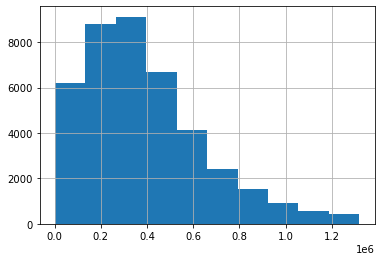

In [117]:
train_scaled.tax_value.hist()

In [140]:
y = train_scaled.tax_value.mean()
y2 = train_scaled.tax_value.median()
print("mean:", y)
print("median:", y2)
#will move forward with mean as baseline

mean: 388200.5241905791
median: 341117.0


In [143]:
#make baseline column
train_scaled['baseline'] = y
train_scaled.head()

,bedrooms,bathrooms,square_feet,tax_value,bedrooms_scaled,bathrooms_scaled,square_feet_scaled,baseline
parcelid,,,,,,,,
11206599,3,3.0,1556.0,228431.0,0.014985,1.000307,-0.139217,388200.524191
13042976,4,3.0,2593.0,379955.0,0.967364,1.000307,1.390792,388200.524191
12867101,2,1.0,1000.0,443723.0,-0.937394,-1.466492,-0.959549,388200.524191
11248986,3,2.0,1468.0,98355.0,0.014985,-0.233092,-0.269053,388200.524191
11400581,2,3.0,1399.0,220257.0,-0.937394,1.000307,-0.370857,388200.524191


In [ ]:
#plot data with baseline


In [174]:
#Create a Handy DataFrame for Evaluating Your Models or Model and Baseline Value.
#turn series into df
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
# Make a copy of my y_train df and name it ols_eval. I will add columns to this dataframe below.

ols_eval = y_train.copy()

# Rename the column actual instead of home_value

ols_eval.rename(columns={'tax_value': 'actual'}, inplace=True)

In [175]:
#Add Baseline Value Column
# Add a column to my ols_eval dataframe called 'baseline_yhat'; each value is the mean of the actual column.

ols_eval['baseline_yhat'] = ols_eval['actual'].mean()

In [176]:
# Now we fit a regression model using OLS method.
# OLS = ordinary least squares.
#create and fit
from statsmodels.formula.api import ols
ols_model = ols(formula='tax_value ~ bedrooms + bathrooms + square_feet', data=train_scaled).fit()

#predict on model
ols_yhat = ols_model.predict(train[['bedrooms', 'bathrooms', 'square_feet']])

In [162]:
#Look at the R-squared and Prob (F-statistic) values in the summary chart.

ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              tax_value   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     4871.
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:16:01   Log-Likelihood:            -5.5896e+05
No. Observations:               40739   AIC:                         1.118e+06
Df Residuals:                   40735   BIC:                         1.118e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.127e+05   3575.276     31.514      0.000    1.06e+05     1.2e+05
bedrooms    -4.946e+04   1404.600    -35.211      0.000   -5.22e+04   -4.67e+04
bathrooms      4.7e+04   1963.381     23.937      0.000    4.31e+04    5.08e+04
square_feet   194.0469      2.530     76.704      0.000     189.088     199.005
==============================================================================
Omnibus:                     3613.638   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5453.724
Skew:                           0.690   Prob(JB):                         0.00
Kurtosis:                       4.145   Cond. No.                     6.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [177]:
#Add ols Predictions Column to ols_eval dataframe
# Add a column to my ols_eval dataframe called 'ols_yhat'; I created these values above.

ols_eval['ols_yhat'] = ols_yhat

In [178]:
ols_eval['residuals'] = ols_eval.ols_yhat - ols_eval.actual

In [179]:
#Compute the RMSE¶
#Using our Handy ols_eval DataFrame that we created above to hold our baseline and model predictions and residuals, we will now find out if our ols model's predictions can beat our baseline.

from sklearn.metrics import mean_squared_error
from math import sqrt

baseline_RMSE = sqrt(mean_squared_error(ols_eval.actual, ols_eval.baseline_yhat))

ols_RMSE = sqrt(mean_squared_error(ols_eval.actual, ols_eval.ols_yhat))

print(f'My model has value: {ols_RMSE < baseline_RMSE}')

My model has value: True


In [180]:
#Compute the R-squared and p-value for the Model we created and find out if our model has value.

ols_r2 = round(ols_model.rsquared,3)

ols_p_value = ols_model.f_pvalue

print(f'My R-squared score is significant: {ols_p_value < .05}')


My R-squared score is significant: True


##### If the RMSE for your ols model is smaller than the RMSE for your baseline, and your p-value is less than your alpha, your model has value.

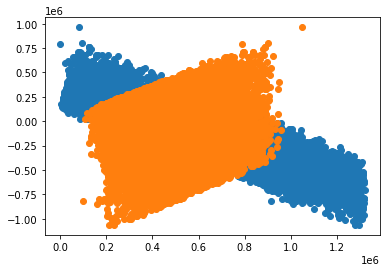

In [181]:
#Visualize Residuals¶
#Quick look at distribution of residuals

plt.hist(np.log(ols_eval.residuals))
#Look for Patterns in Actual vs Residuals

plt.scatter(ols_eval.actual, ols_eval.residuals)
#Look at Predictions vs Residuals

plt.scatter(ols_eval.ols_yhat, ols_eval.residuals)

In [182]:
# Imports from sklearn

from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

from sklearn.linear_model import LinearRegression

In [183]:
#create linear regression object
lm = LinearRegression()

In [187]:
# fit the linear regression object to xtrain and y train
lm.fit(X_train, y_train)

LinearRegression()

In [189]:
#Use the Linear Regression Object to Return Intercept and Coefficient Values

print('intercept: ', lm.intercept_)

print("coefficients: ", lm.coef_)

intercept:  [112671.41963353]
coefficients:  [[-49456.8245278   46996.54292342    194.04691137]]


In [191]:
# Create the `lm_eval` dataframe using a copy of the y_train dataframe.

lm_eval = y_train.copy()

# Rename the target value `actual`

lm_eval.rename(columns={'tax_value': 'actual'}, inplace=True)

# Predict on X_train and add `yhat_lm1` column to `lm_eval` dataframe.

lm_eval['yhat_lm1'] = lm.predict(X_train)

# Calculate the residuals for my lm (linear regression model) and add `residuals_lm1` column on `lm_eval` dataframe.

lm_eval['residuals_lm1'] = lm_eval.yhat_lm1 - lm_eval.actual

In [192]:
# Calculate and display the RMSE for lm (linear regression model)

RMSE_lm1 = np.sqrt(mean_squared_error(lm_eval.actual, lm_eval.yhat_lm1))

print('The Root Mean Squared Error is {:.3}'.format(RMSE_lm1))

# Calculate and display the r-squared for my lm

r2_lm1 = r2_score(lm_eval.actual, lm_eval.yhat_lm1)

print('Using my Train dataset in my Linear Regression Model')

print()

print(f'{r2_lm1:.2%} of the variance in my target value can be explained by the features in my Linear Regression Model.')

The Root Mean Squared Error is 2.2e+05
Using my Train dataset in my Linear Regression Model

26.40% of the variance in my target value can be explained by the features in my Linear Regression Model.


In [193]:
#validate
#create linear regression object
lm = LinearRegression()
# fit the linear regression object to xtrain and y train
lm.fit(X_validate, y_validate)

LinearRegression()

In [194]:
#Use the Linear Regression Object to Return Intercept and Coefficient Values

print('intercept: ', lm.intercept_)

print("coefficients: ", lm.coef_)

intercept:  [107778.78062974]
coefficients:  [[-50047.44727853  45533.83413583    201.45542647]]


In [196]:
#Use the Linear Regression Object to Predict y Values

# Create the `lm_eval` dataframe using a copy of the y_train dataframe.

lm_eval = y_validate.copy()

# Rename the target value `actual`

lm_eval.rename(columns={'tax_value': 'actual'}, inplace=True)

# Predict on X_validate and add `yhat_lm1` column to `lm_eval` dataframe.

lm_eval['yhat_lm1'] = lm.predict(X_validate)

# Calculate the residuals for my lm (linear regression model) and add `residuals_lm1` column on `lm_eval` dataframe.

lm_eval['residuals_lm1'] = lm_eval.yhat_lm1 - lm_eval.actual

In [197]:
# Calculate and display the RMSE for lm (linear regression model)

RMSE_lm1 = np.sqrt(mean_squared_error(lm_eval.actual, lm_eval.yhat_lm1))

print('The Root Mean Squared Error is {:.3}'.format(RMSE_lm1))

# Calculate and display the r-squared for my lm

r2_lm1 = r2_score(lm_eval.actual, lm_eval.yhat_lm1)

print('Using my Train dataset in my Linear Regression Model')

print()

print(f'{r2_lm1:.2%} of the variance in my target value can be explained by the features in my Linear Regression Model.')

The Root Mean Squared Error is 2.16e+05
Using my Train dataset in my Linear Regression Model

27.94% of the variance in my target value can be explained by the features in my Linear Regression Model.


#### polynomial regression model

In [199]:
# Imports from sklearn

from sklearn.preprocessing import PolynomialFeatures

In [200]:
#Create the Polynomial Features

poly = PolynomialFeatures(degree=2)

In [201]:
#Fit and Transform the Polynomial Features using X_train and Save in a DataFrame

poly.fit(X_train, y_train)

X_poly = pd.DataFrame(poly.transform(X_train), columns=poly.get_feature_names(X_train.columns))

In [205]:
X_poly.shape

(40739, 10)

In [206]:
y_train.shape

(40739, 1)

In [207]:
#Use the Polynomial Features in a Linear Regression Model

# Create the lm object

lm = LinearRegression()

# Fit the lm object on X_poly and y_train

lm.fit(X_poly, y_train)



LinearRegression()

In [209]:
# Create a new column on your `lm_eval` dataframe to hold the predictions using polynomial regression model.

lm_eval['polynomial'] = pd.DataFrame(lm.predict(X_poly))

### Baseline

In [118]:

mean, median = train_scaled.tax_value.agg(['mean', 'median'])
mean, median

(388200.5241905791, 341117.0)

## Zillow Planning 2nd Iteration:

## Phase 1


### First Iteration Features
- square feet
- number of bedrooms
- number of bathrooms
- taxvaluedollarcnt (target)

## Phase 2

### Change to int:
- bedroomcnt
- yearbuilt
- regionidcounty
- fips
- latitude
- longitude


### Encode
- fips
- regionidcounty

### New features to make:
- residence_age = how old the residence is
- 

In [5]:
#functions to get specific zillow data
def acquire_some_more_zillow():
    '''
    This function reads in the zillow data from the Codeup 
    Database connection made from get_connection
    and returns a pandas DataFrame with all columns.
    '''
    sql_query = '''
                SELECT parcelid, bedroomcnt, bathroomcnt, buildingqualitytypeid, yearbuilt, 
                regionidcounty, regionidzip, fips, latitude, longitude, calculatedfinishedsquarefeet, 
                taxamount, taxvaluedollarcnt
                FROM  properties_2017
                JOIN predictions_2017 USING(parcelid)
                WHERE transactiondate between "2017-05-01" and "2017-08-31"
                and unitcnt = 1;
                '''
    return pd.read_sql(sql_query, get_connection('zillow')) 


def get_some_more_zillow_data(cached=False):
    '''
    This function reads in zillow data from Codeup database and 
    writes data to a csv file if cached == False. If cached == True 
    reads in zillow df from a csv file, returns df.
    '''
    if cached == False or os.path.isfile('zillow.csv') == False:
        
        # Read fresh data from db into a DataFrame.
        df2 = acquire_some_more_zillow()
        
        # Write DataFrame to a csv file.
        df2.to_csv('zillow.csv')
        
    else:
        
        # If csv file exists or cached == True, read in data from csv.
        df2 = pd.read_csv('zillow.csv', index_col=0)
        
    return df2

In [6]:
df2 = get_some_more_zillow_data(cached=False)

In [7]:
df2.head()

,parcelid,bedroomcnt,bathroomcnt,buildingqualitytypeid,yearbuilt,regionidcounty,regionidzip,fips,latitude,longitude,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt
0,11721753,3.0,2.0,6.0,1923.0,3101.0,95997.0,6037.0,34033180.0,-118355396.0,1316.0,2627.48,205123.0
1,11289917,3.0,2.0,6.0,1970.0,3101.0,97318.0,6037.0,34686163.0,-118113100.0,1458.0,2319.90,136104.0
2,11637029,3.0,2.0,9.0,1980.0,3101.0,96086.0,6037.0,34073222.0,-118390965.0,1766.0,9407.01,810694.0
3,11705026,2.0,1.0,6.0,1911.0,3101.0,96018.0,6037.0,33999877.0,-118291863.0,1421.0,543.69,35606.0
4,11446756,3.0,2.0,6.0,1955.0,3101.0,96162.0,6037.0,33873860.0,-118338253.0,1491.0,1399.27,107110.0


In [8]:
df2.describe()


,parcelid,bedroomcnt,bathroomcnt,buildingqualitytypeid,yearbuilt,regionidcounty,regionidzip,fips,latitude,longitude,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt
count,2.495000e+04,24950.00000,24950.000000,24685.000000,24943.000000,24950.000000,24939.000000,24950.000000,2.495000e+04,2.495000e+04,24948.000000,24949.000000,2.495000e+04
mean,1.190844e+07,2.96016,2.251864,6.657687,1964.958265,3100.740080,96439.241469,6037.005611,3.411000e+07,-1.182673e+08,1709.276816,6047.777105,4.807596e+05
std,3.349340e+06,1.00650,0.993814,1.688723,24.159069,20.961869,5441.615909,0.526930,2.211190e+05,2.198762e+05,944.327658,8045.998644,6.830046e+05
min,1.071186e+07,0.00000,0.000000,1.000000,1878.000000,1286.000000,95982.000000,6037.000000,3.333960e+07,-1.190601e+08,240.000000,120.840000,1.000000e+03
25%,1.117189e+07,2.00000,2.000000,6.000000,1950.000000,3101.000000,96124.000000,6037.000000,3.395810e+07,-1.184330e+08,1144.000000,2606.070000,1.880000e+05
50%,1.179469e+07,3.00000,2.000000,7.000000,1962.000000,3101.000000,96291.000000,6037.000000,3.409450e+07,-1.182911e+08,1480.000000,4339.450000,3.349620e+05
75%,1.249927e+07,4.00000,3.000000,8.000000,1984.000000,3101.000000,96420.000000,6037.000000,3.419689e+07,-1.181170e+08,1988.000000,6789.070000,5.439060e+05
max,1.676560e+08,11.00000,11.000000,12.000000,2016.000000,3101.000000,399675.000000,6111.000000,3.481877e+07,-1.176665e+08,35640.000000,276797.830000,2.385837e+07


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24950 entries, 0 to 24949
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      24950 non-null  int64  
 1   bedroomcnt                    24950 non-null  float64
 2   bathroomcnt                   24950 non-null  float64
 3   buildingqualitytypeid         24685 non-null  float64
 4   yearbuilt                     24943 non-null  float64
 5   regionidcounty                24950 non-null  float64
 6   regionidzip                   24939 non-null  float64
 7   fips                          24950 non-null  float64
 8   latitude                      24950 non-null  float64
 9   longitude                     24950 non-null  float64
 10  calculatedfinishedsquarefeet  24948 non-null  float64
 11  taxamount                     24949 non-null  float64
 12  taxvaluedollarcnt             24950 non-null  float64
dtypes

In [10]:
df2.isnull().sum()

parcelid                          0
bedroomcnt                        0
bathroomcnt                       0
buildingqualitytypeid           265
yearbuilt                         7
regionidcounty                    0
regionidzip                      11
fips                              0
latitude                          0
longitude                         0
calculatedfinishedsquarefeet      2
taxamount                         1
taxvaluedollarcnt                 0
dtype: int64

In [11]:
df2.fips.value_counts()

6037.0    24946
6059.0        3
6111.0        1
Name: fips, dtype: int64

In [ ]:
# drop the two nulls/nans observed earlier
df2 = df2.dropna()


In [ ]:
df2.isnull().sum()

In [ ]:
#add new features
df2['property_age'] = 2021 - df2.yearbuilt

In [ ]:
#tax rate

df2['tax_rate'] = (df2.taxamount / df2.taxvaluedollarcnt) * 100

In [ ]:
df2.info()

In [ ]:
#change all floats to ints for the ones that make sense
df2['bedroomcnt'] = df2.bedroomcnt.astype('int')
df2['bathroomcnt'] = df2.bathroomcnt.astype('int')
df2['yearbuilt'] = df2.yearbuilt.astype('int')
df2['regionidzip'] = df2.regionidzip.astype('int')
df2['regionidcounty'] = df2.regionidcounty.astype('int')
df2['fips'] = df2.fips.astype('int')
df2['latitude'] = df2.latitude.astype('int')
df2['longitude'] = df2.longitude.astype('int')
df2['property_age'] = df2.property_age.astype('int')


In [ ]:
df2.info()

In [33]:
#rename cols
df2 = df2.rename(columns={"bedroomcnt": "bedrooms", 
                        "bathroomcnt": "bathrooms", 
                        "calculatedfinishedsquarefeet": "square_feet", 
                        "taxvaluedollarcnt": "tax_value",
                        "regionidzip": "zip_code",
                        "regionidcounty": "county",
                        "buildingqualitytypeid": "property_quality"})

In [34]:
df2.head()

,parcelid,bedrooms,bathrooms,property_quality,yearbuilt,county,zip_code,fips,latitude,longitude,square_feet,taxamount,tax_value
0,11721753,3.0,2.0,6.0,1923.0,3101.0,95997.0,6037.0,34033180.0,-118355396.0,1316.0,2627.48,205123.0
1,11289917,3.0,2.0,6.0,1970.0,3101.0,97318.0,6037.0,34686163.0,-118113100.0,1458.0,2319.90,136104.0
2,11637029,3.0,2.0,9.0,1980.0,3101.0,96086.0,6037.0,34073222.0,-118390965.0,1766.0,9407.01,810694.0
3,11705026,2.0,1.0,6.0,1911.0,3101.0,96018.0,6037.0,33999877.0,-118291863.0,1421.0,543.69,35606.0
4,11446756,3.0,2.0,6.0,1955.0,3101.0,96162.0,6037.0,33873860.0,-118338253.0,1491.0,1399.27,107110.0


In [ ]:
#quick csv for tableau
df2.to_csv('zillow2.csv')

In [35]:
df2.fips.value_counts()

6037.0    24946
6059.0        3
6111.0        1
Name: fips, dtype: int64

In [37]:
df2.property_quality.mean()

6.657686854364999

In [38]:
df2.property_quality.median()

7.0

### Change fips county numbers to the counties they represent


In [ ]:
#df['first_set'] = df['first_set'].replace(['Blue'],'Green')